In [3]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4]:
#fetching the dataset
url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day49-regression-metrics/placement.csv'
req = requests.get(url)
data = StringIO(req.text)

In [5]:
df = pd.read_csv(data)
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [6]:
df.to_csv('placements.csv' , index=False)

## Loading Dataset

In [8]:
data = pd.read_csv('placements.csv')
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [9]:
data.shape

(200, 2)

### Simple linear regression is a statistical method used to model the relationship between two variables: one independent variable (often denoted as "x") and one dependent variable (often denoted as "y"). In your example, the independent variable "x" could be the CGPA (Cumulative Grade Point Average), and the dependent variable "y" could be another metric, such as job placement rate.

- The equation you've provided, __y = mx + b__, represents the relationship between these variables:

      - y represents the dependent variable (output feature), which is what you're trying to predict or explain.
      - x represents the independent variable (input feature), which is the predictor or explanatory variable.
      - m represents the slope of the line, which indicates the degree and direction of the relationship between x and y. In other words, it shows how much y changes for a one-unit change in x.
      - b represents the intercept of the line, which is the value of y when x is zero. It's the point where the line intersects the y-axis.

- The goal of simple linear regression is to find the best-fitting line through the data points that minimizes the difference between the observed values of y and the values predicted by the line. This line allows us to make predictions about the dependent variable (y) based on the values of the independent variable (x).

- In the context of your placement dataset, you might use simple linear regression to understand how CGPA (independent variable) influences job placement rate (dependent variable). By fitting a line to the data points representing CGPA and job placement rate, you can determine the strength and direction of this relationship and make predictions about job placement rates for different CGPA values.


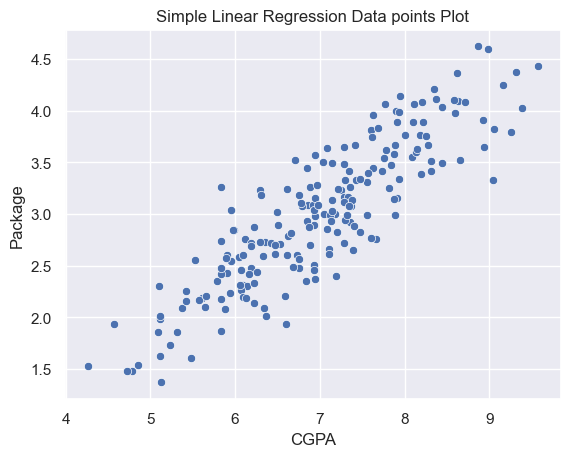

In [10]:
sns.scatterplot(x=data['cgpa'] , y= data['package'])
plt.title('Simple Linear Regression Data points Plot')
plt.xlabel('CGPA')
plt.ylabel('Package');

In [13]:
X = data.drop(['package'] , axis=1)
y = data['package']

In [14]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [15]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=22)

In [17]:
X_train

,cgpa
61,5.48
151,6.12
31,8.10
150,6.30
148,7.57
...,...
100,7.95
192,8.25
44,5.09
132,5.84


In [21]:
y_train

61     1.61
151    2.76
31     3.89
150    2.73
148    3.40
       ... 
100    4.14
192    3.75
44     1.86
132    2.48
117    2.99
Name: package, Length: 160, dtype: float64

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X_train , y_train)

LinearRegression()

In [25]:
X_test.head(2)

,cgpa
144,6.17
157,6.47


In [26]:
y_test.head(2)

144    2.42
157    2.70
Name: package, dtype: float64

In [30]:
#In this i have checked the prediction of first xtest cgpa value of 6.17 by which package is of in data is 2.42
#And its showing in prediction 2.51(close)

import warnings
warnings.filterwarnings('ignore')

lr.predict(X_test.iloc[0].values.reshape(1,1))

array([2.51244623])

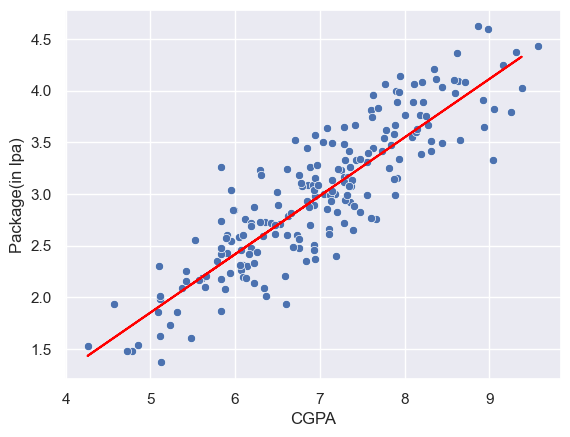

In [31]:
sns.scatterplot(x=data['cgpa'] , y=data['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)');

### This graphs showing the best fitted line for package 

In [32]:
#Now to calculate y= mx + b

#for m 
m = lr.coef_
m

array([0.56501274])

In [33]:
#for b
b = lr.intercept_
b

-0.9736823668217265

In [34]:
#now applying this formula for checking prediction
y = m * 6.17 + b
print(y)

[2.51244623]


In [35]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

array([2.51244623])

### Now checking Metrics for this MAE , MSE , RMSE , R2_SCORE , ADJUSTED R2_SCORE

In [37]:
#MAE - Mean Absolute error
y_pred = lr.predict(X_test)
print('MAE(Mean Absolute Error) ' , mean_absolute_error(y_test , y_pred))

MAE(Mean Absolute Error)  0.2650980270523437


- __The Mean Absolute Error (MAE) is a metric used to evaluate how well a regression model (like the one you've trained) performs at predicting the target variable (in this case, job placement rate) on unseen data. Here's a simple explanation:__

- Imagine you have a bunch of predictions for job placement rates based on your model, and you want to see how close these predictions are to the actual job placement rates. The MAE gives you an average of how much your predictions differ from the actual values, taking into account only the magnitude of these differences, regardless of whether they are overestimates or underestimates.

- __So, if your MAE is 0.27, it means that, on average, your model's predictions are off by about 0.27 units from the actual job placement rates. The lower the MAE, the better your model is at making accurate predictions.__

- In summary, MAE is a measure of the average magnitude of errors between predicted and actual values, providing a straightforward assessment of how well your model performs.


### QUES - IS MAE is also known as Loss Function?

- Yes, the term __"loss function"__ is often used interchangeably with the term __"error function"__ or __"cost function"__ in the context of regression. The MAE is indeed a type of loss function used to measure the difference between predicted and actual values in regression tasks. The goal is typically to minimize this loss function when training the model.


In [38]:
#MSE - Mean Squared Error

print('MSE(Mean Squared Error) ', mean_squared_error(y_test , y_pred))

MSE(Mean Squared Error)  0.10186655845113166


In [39]:
np.sqrt(0.10186655845113166)

0.31916540923341247

- __The Mean Squared Error (MSE) is another commonly used metric to evaluate the performance of regression models. It calculates the average of the squares of the differences between the predicted values and the actual values. Here's an explanation:__

- __If your MSE is 0.101, it means that, on average, the square of the difference between your model's predictions and the actual values is 0.101. The unit of MSE is the square of the unit of the target variable. So if your target variable is in LPA, the unit of MSE would be (LPA)^2.__

- Comparing MSE with MAE:

    - __Magnitude of Errors:__ MSE penalizes larger errors more heavily than MAE because it squares the differences. This makes MSE more sensitive to outliers or large errors in the data.

    - __Interpretation:__ MAE is easier to interpret since it gives you the average magnitude of errors directly, while MSE gives you the average of the squared errors, which might be harder to interpret intuitively.

    - __Optimization:__ MSE is more commonly used in model training because it leads to simpler mathematical calculations and has nice analytical properties for optimization algorithms. However, MAE is more robust to outliers and may be preferred in situations where outliers are significant.

    - __Sensitivity:__ MSE can be sensitive to outliers because of squaring the errors. A single large error can significantly inflate the MSE. MAE, on the other hand, treats all errors equally, making it less sensitive to outliers.

In summary, MSE and MAE serve similar purposes as evaluation metrics for regression models, but they differ in how they measure and penalize errors. MSE may be preferred in certain contexts, especially in model training and optimization, but it's essential to consider the characteristics of your data and the goals of your analysis when choosing between them.


In [40]:
#RMSE - Root Mean Squared Error

print('RMSE(Root Mean Squared Error) ',np.sqrt(mean_squared_error(y_test , y_pred)))

RMSE(Root Mean Squared Error)  0.31916540923341247


In [41]:
#R2_Score

print('R2-SCORE ',r2_score(y_test , y_pred))

R2-SCORE  0.7507685626720517


- __The R-squared (R2) score is a statistical measure that represents the proportion of the variance in the dependent variable (y) that is predictable from the independent variable(s) (X) in a regression model. Here's an explanation:__

- __Range:__ The R2 score typically ranges from 0 to 1. A score of 1 indicates that the regression model perfectly predicts the dependent variable, while a score of 0 indicates that the model does not explain any of the variability in the dependent variable.

- __Interpretation:__ An R2 score of, say, 0.75 means that 75% of the variance in the dependent variable can be explained by the independent variable(s) included in the model. In other words, the model accounts for 75% of the observed outcomes.

- __Comparison with Baseline:__ R2 can also be interpreted as the proportion of the variance in the dependent variable that is captured by the model, relative to a simple baseline model that predicts the mean of the dependent variable for all observations. If the R2 score is 0, it means that the model performs no better than this baseline; if it's 1, it means the model perfectly predicts the observed outcomes.

- __Goodness of Fit:__ R2 is often used as a measure of the goodness of fit of a regression model. However, it doesn't tell you whether the coefficient estimates and predictions are biased or unbiased, only how well the model fits the observed data.

In [47]:
#Adjusted R2 Score

#Formula : 1 - ((1-r2)*(n-1)/(n-1-k))
#where , r2 is original score of r2 calculated
#n is number of test size shape in this case (40,1)
#k is number of input based features in dataset [in this dataset it's only cgpa]
r2 = r2_score(y_test , y_pred)
print(1 - ((1-r2) * (40-1)/ (40-1-1)))
print('\n')
print(X_test.shape)

0.7442098406371057


(40, 1)


## In Adjusted R2 Score if we add an unnecessary feature to our dataset suppose like any random column in this placement dataset then it'll decrease the performance of my model and in adjusted r2 score it's to show the variability of an feature will go down lets see by an example

In [50]:
#creating a new dataframe
df_randm = data.copy()

#creating a random feature
df_randm['Random'] = np.random.random(200)

#putting them together
df_randm = df_randm[['cgpa' , 'Random' , 'package']]
df_randm.head()

,cgpa,Random,package
0,6.89,0.511958,3.26
1,5.12,0.609931,1.98
2,7.82,0.735389,3.25
3,7.42,0.131154,3.67
4,6.94,0.117313,3.57


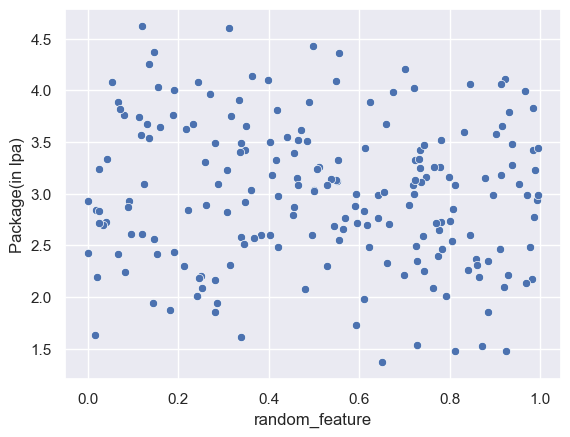

In [51]:
#plotting a graph
sns.scatterplot(x=df_randm['Random'] , y=df_randm['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)');

In [52]:
X_rand = df_randm.drop(['package'] , axis=1)
y_rand = df_randm['package']

In [53]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X_rand , y_rand , test_size=0.2 , random_state=29)

In [54]:
lr_rand = LinearRegression()

In [55]:
lr_rand.fit(x_train , y_train)

LinearRegression()

In [57]:
#lr_rand.predict(x_test)

In [59]:
y_pred = lr_rand.predict(x_test)
r2_score(y_test , y_pred)

0.6745377144787367

- __As we can clearly see that model performance have been reduced__

In [60]:
#adjusted r2 score

1 - ((1 - r2_score(y_test , y_pred)) * (40-1)/(40-1-2))

0.6569451585046143

- __As we can see the adjusted r2 score is more degraded__

## Now we'll take an useful feature like __iq__

In [61]:
#creating a new Dataframe
df_iq = data.copy()

#Creating iq feature
df_iq['iq'] = df_iq['package'] + (np.random.randint(-12,12,200)/10)

df_iq = df_iq[['cgpa' , 'iq' , 'package']]

In [62]:
df_iq.sample(5)

,cgpa,iq,package
85,4.79,0.28,1.48
119,7.39,2.75,2.65
25,7.28,4.55,3.65
33,6.35,2.73,2.73
143,4.85,1.74,1.54


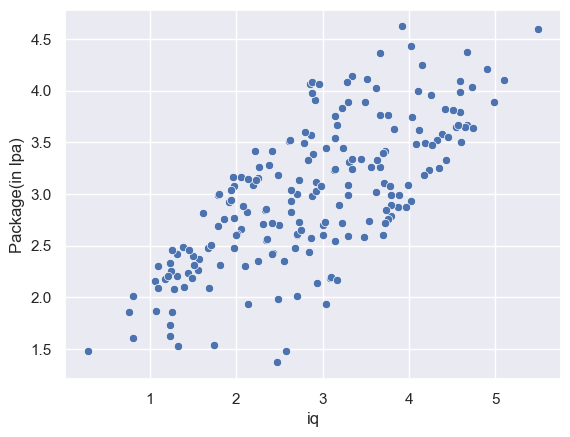

In [63]:
#plotting a graph

sns.scatterplot(x=df_iq['iq'] , y=df_iq['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)');

In [64]:
X_iq = df_iq.drop(['package'] , axis=1)
y_iq = df_iq['package']

In [65]:
from sklearn.model_selection import train_test_split

x_train_iq , x_test_iq , y_train_iq , y_test_iq = train_test_split(X_iq , y_iq , test_size=0.2 , random_state=32)

In [66]:
lr_iq = LinearRegression()

In [67]:
lr_iq.fit(x_train_iq , y_train_iq)

LinearRegression()

In [69]:
#r2 score

y_pred_iq  = lr_iq.predict(x_test_iq)
r2_score(y_test_iq , y_pred_iq)

0.851588662153741

- __SEE NOW AFTER THE USEFUL FEATURE ADDED THEN MODEL VARIBALITY TELLING IS ALSO INCREASES__

In [70]:
#adjusted r2 score

1 - ((1 - r2_score(y_test_iq , y_pred_iq)) * (40-1) / (40-1-2))

0.8435664276755648

- __ADJUSTED R2 SCORE IS ALSO INCREASED IT TELLS US THE IMPORTANCE OF FEATURES IN ANY MODEL__